## Модуль 1.1: Python для аналитиков
Домашнее задание

P.S первую часть домашнего задания вы можете найти в файле с занятия

Дедлайн: 13 января 23:59


#### Задание №2

    Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
    Сколько в датасете пропущенных значений?
    Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
    Сколько транзакций завершились ошибкой?
    Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
    Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
    Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.
    Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

Описание данных

Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)

name – имя пользователя

transaction – статус транзакции

minute* – сколько минут прошло с начала дня


##### Важно: ответ на каждый из вопросов надо предоставить в виде кода и краткого комментария к ответу

In [1]:
import pandas as pd 
import seaborn as sbr 


In [6]:
    myfile = "C:/Users/user/Downloads/transaction_data.csv"
trans_data = pd.read_csv(myfile)
trans_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [8]:
trans_data.shape # размерность датафрейма

(5315, 3)

In [9]:
trans_data.dtypes # типы переменных

date           object
name           object
transaction    object
dtype: object

In [10]:
trans_data.isnull().sum() # число пропущенных значений

date           0
name           0
transaction    0
dtype: int64

In [11]:
trans_data.describe() # описательная статистика

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


<Axes: xlabel='transaction'>

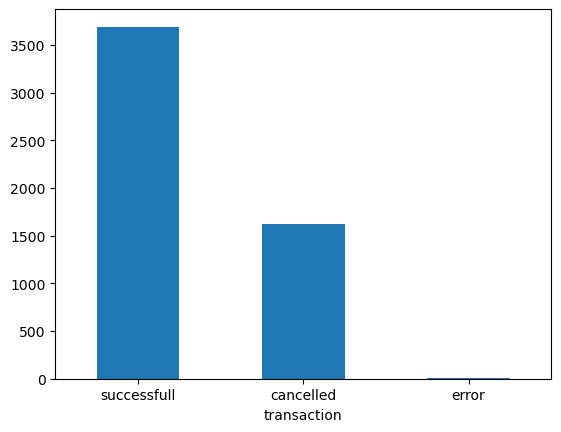

In [12]:
df = trans_data.transaction.value_counts() # количество успешных, отменных и ошибочных транзакции 
df.plot.bar(x=df, rot=0) 

In [13]:
trans_data \
    .query("transaction == 'error'")['transaction'].count() # количество ошибок

4

<Axes: xlabel='name'>

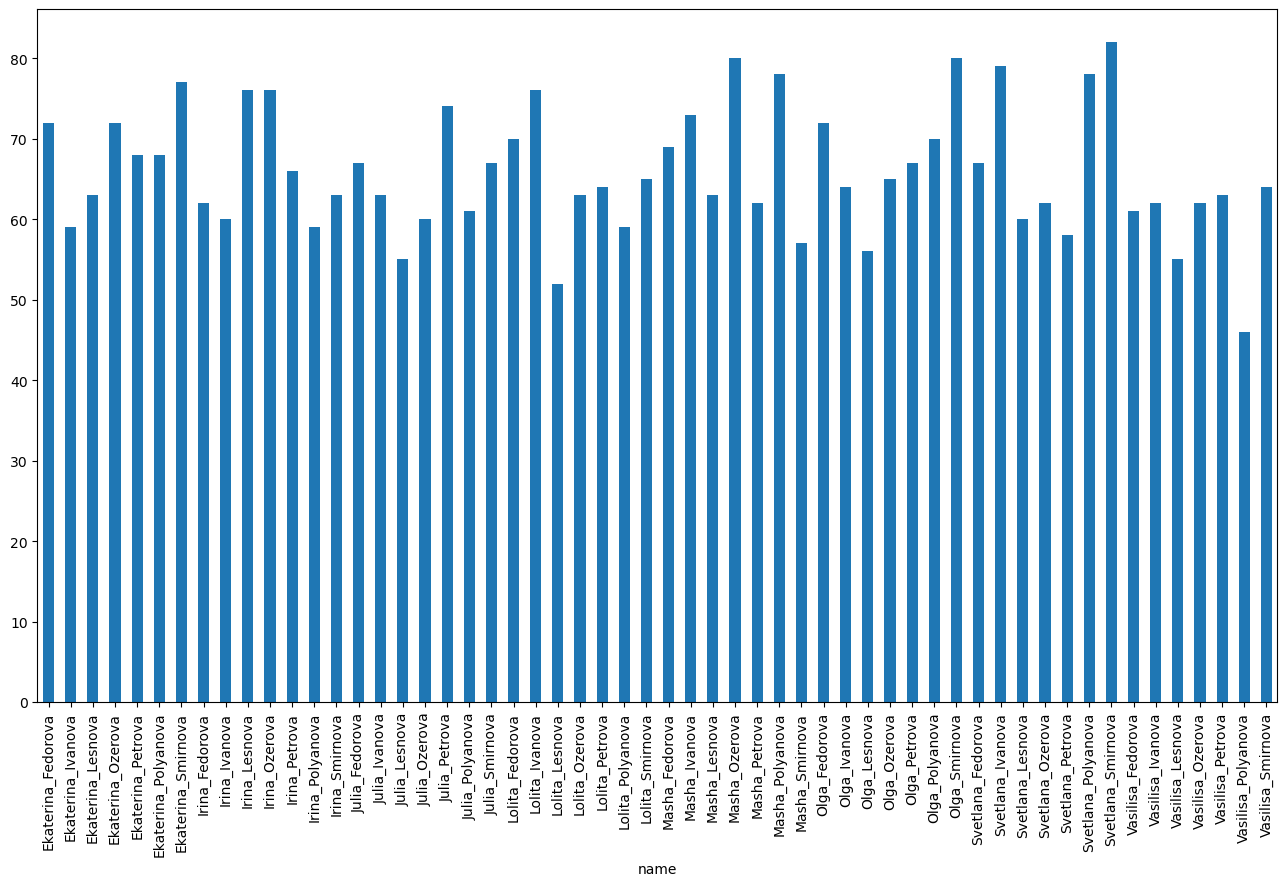

In [14]:
df = trans_data.query("transaction == 'successfull'")
#df['name'].hist(bins=100, figsize=(16, 9)) # используя метод hist

df = df.groupby('name', as_index=False).agg({'transaction':'count'})
df.plot.bar(x='name', y='transaction', legend=False, figsize=(16, 9)) # используя метод bar (так понятнее выводится)

In [17]:
myfile_up = "C:/Users/user/Downloads/transaction_data_updated.csv"
upd_trans_data = pd.read_csv(myfile_up)
upd_trans_data.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [18]:
df = upd_trans_data.groupby(['name', 'minute']).agg({'transaction':'count'})
df.head()

transaction
name               minute             
Ekaterina_Fedorova 0                 3
                   1                 4
                   2                 1
                   3                 3
                   4                 3

In [19]:
upd_trans_data.isnull().sum() # пропусков нет

date           0
name           0
transaction    0
minute         0
dtype: int64

In [21]:
df = upd_trans_data
# новый столбец true_date
df['true_minute'] = df['minute'] + pd.to_datetime(df['date']).dt.hour * 60
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


## Задание №3

Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

InvoiceNo — номер транзакции

StockCode — код товара

Description — описание товара

Quantity — количество единиц товара, добавленных в заказ

InvoiceDate — дата транзакции

UnitPrice — цена за единицу товара

CustomerID — id клиента

Country — страна, где проживает клиент

Данные можно скачать отсюда.

В данной задаче ссылка для считывания данных лежит в переменной path_to_file.

Импортируйте пандас и прочитайте данные с кодировкой ISO-8859-1. Запишите полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns.

Вопросы:

    Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail и скажите сколько дупликатов было в таблице?.
    Данные содержат в себе записи как и об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled). Сколько всего заказов отменили пользователи?
    Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.
    Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id). (Отфильтрованные данные записаны в retail. Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.)
    Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany. (Датафрейм записан в retail, нужные id пользователей – в germany_top.)
    Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.
    Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.(Отфильтрованные данные записаны в retail.)
    Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)



In [22]:
import pandas as pd 
import numpy as np 


In [24]:
myfile_1 = "C:/Users/user/Downloads/data.csv"
retail = pd.read_csv(myfile_1, encoding='windows-1251', sep=',')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [25]:
retail_columns = retail.columns
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [26]:
duplicate = retail[retail.duplicated ()] # датафрейм дубликатов
duplicate.shape # всего 0 дублирующих строк

(5268, 8)

In [27]:
canceled_orders_count = len(retail[retail['InvoiceNo'].str.startswith('C')])
canceled_orders_count # всего 9288 отмененных заказов

9288

In [28]:
retail = retail.query('Quantity > 0')
retail.shape

(531285, 8)

In [29]:
df = (
    retail
    .query('Country == "Germany"')
    .groupby('CustomerID', as_index=False)
    .agg({'InvoiceNo':'count'})
)
percentile = np.percentile(df['InvoiceNo'], 80) # нашли персентиль 80%

df = df.query('InvoiceNo > @percentile')
print(df)

germany_top = list(df['CustomerID'])

    CustomerID  InvoiceNo
3      12471.0        460
4      12472.0        339
5      12473.0        168
6      12474.0        424
8      12476.0        233
9      12477.0        300
12     12481.0        217
20     12517.0        284
37     12569.0        188
52     12621.0        467
56     12626.0        294
57     12627.0        230
69     12662.0        230
71     12668.0        161
77     12705.0        334
78     12708.0        157
79     12709.0        208
83     12720.0        354
90     13815.0        176


In [30]:
top_retail_germany = retail.query('CustomerID == @germany_top')
top_retail_germany.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany


In [31]:
df = (
    top_retail_germany
    .groupby('StockCode')
    .agg({'Quantity':'count'})
    .sort_values(by='Quantity', ascending=False)
    )
df.head() # товар с кодом 22326 добавляли в корзину чаще всего

,Quantity
StockCode,
POST,180
22326,71
22328,46
22423,42
20719,37


In [32]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice'] # новая колонка Revenue
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [33]:
df = retail.groupby('InvoiceNo', as_index=False).agg({'Revenue':'sum'}).sort_values(by='Revenue', ascending=False)
df.iloc[0:5] # топ 5 товаров по сумме заказа

,InvoiceNo,Revenue
20689,581483,168469.60
2202,541431,77183.60
17582,574941,52940.94
18251,576365,50653.91
9034,556444,38970.00
